In [1]:
import sys
sys.path.append("../")
from src.func import *

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [89]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


In [91]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

(28, 28)

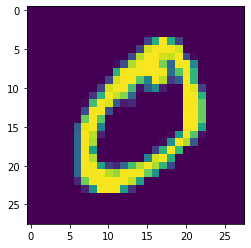

In [90]:
plt.imshow(train_images[1])
train_images[1].shape

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
model.fit(train_images, train_labels_hot, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 15s 37ms/step - loss: 0.2442 - accuracy: 0.9238 - val_loss: 0.0586 - val_accuracy: 0.9842
Epoch 2/10
422/422 [==============================] - 16s 39ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0639 - val_accuracy: 0.9810
Epoch 3/10
422/422 [==============================] - 17s 39ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 4/10
422/422 [==============================] - 17s 39ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 5/10
422/422 [==============================] - 17s 41ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 6/10
422/422 [==============================] - 18s 42ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0394 - val_accuracy: 0.9900
Epoch 7/10
422/422 [==============================] - 17s 41ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0322 - val_accuracy:

In [6]:
name = "8big2.png"
image = load_my_image(name)
image.shape

(308, 417, 3)

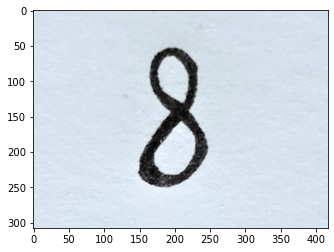

In [7]:
plt.imshow(image)

In [8]:
image = crop_and_reshape_numbers(image)
image.shape

(28, 28, 3)

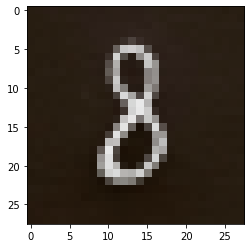

In [9]:
plt.imshow(image)

In [10]:
num_model = fig_to_model_format(image)
num_model.shape

(1, 28, 28, 1)

In [60]:
res = model.predict(num_model)
print(f"The number is {res[0]}")

The number is [1.0459984e-07 5.8367007e-08 8.8978959e-06 5.7695466e-05 4.9601550e-07
 1.1963154e-07 1.5740392e-09 3.0435586e-08 9.9992955e-01 3.1009752e-06]


In [83]:
def number_or_not(sudolist):
    numnot = []
    for square in sudolist:   
        contrast = change_contrast(square)
        cut = crop_and_reshape_numbers (contrast)
        scale = average_pixel_color(cut)
        if scale < 9:
            numnot.append(0)
        else:
            squarecut = crop_and_reshape_numbers(square)
            contrast = change_contrast(squarecut)
            
            #kernel = np.ones((2,2), np.uint8) 

            #img_erosion = cv2.erode(contrast, kernel, iterations=1) 
            #img_dilation = cv2.dilate(contrast, kernel, iterations=1)
            ksize = (3, 3) 
  
            blur = cv2.blur(contrast, ksize) 
            squareform = fig_to_model_format(blur)
            
            res = np.argmax(model.predict(squareform), axis=-1)
            numnot.append(res[0])
    return numnot

In [84]:
def average_pixel_color (num):
    graynum = cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
    long = graynum.shape[0]*graynum.shape[1]
    graynum = graynum.reshape((long))
    average_color = sum(graynum)/long
    return average_color

In [85]:
recortado = sudoku_cut_frame("sudokuwik.png")
lista = sudoku_split_81(recortado)
number_or_not(lista)

[5,
 3,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 1,
 9,
 5,
 0,
 0,
 0,
 0,
 9,
 8,
 0,
 0,
 0,
 0,
 6,
 0,
 8,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 3,
 4,
 0,
 0,
 8,
 0,
 3,
 0,
 0,
 1,
 7,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 2,
 8,
 0,
 0,
 0,
 0,
 4,
 1,
 9,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 7,
 9]

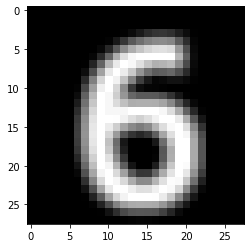

In [65]:
squarecut = crop_and_reshape_numbers(lista[25])
contrast = change_contrast(squarecut)

kernel = np.ones((2,2), np.uint8) 

#img_erosion = cv2.erode(contrast, kernel, iterations=1) 
img_dilation = cv2.dilate(contrast, kernel, iterations=1)

# ksize 
ksize = (3, 3) 
  
# Using cv2.blur() method  
blur = cv2.blur(img_dilation, ksize)  
plt.imshow(blur)

In [9]:
from keras.models import load_model
#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [68]:
def number_or_not_prob(sudolist):
    numnot = []
    for square in sudolist:   
        contrast = change_contrast(square)
        cut = crop_and_reshape_numbers (contrast)
        scale = average_pixel_color(cut)
        if scale < 9:
            numnot.append(0)
        else:
            squarecut = crop_and_reshape_numbers(square)
            contrast = change_contrast(squarecut)
            
            kernel = np.ones((2,2), np.uint8) 

            #img_erosion = cv2.erode(contrast, kernel, iterations=1) 
            img_dilation = cv2.dilate(contrast, kernel, iterations=1)

            ksize = (3, 3) 
  
            blur = cv2.blur(img_dilation, ksize) 
            squareform = fig_to_model_format(blur)
            
            res = model.predict(squareform)
            print(res)
    

In [69]:
number_or_not_prob(lista)

[[7.7117154e-13 3.7414946e-10 3.8306079e-14 6.0750871e-09 9.3394780e-12
  9.9999976e-01 1.2316243e-11 2.2218098e-12 2.7399543e-09 1.8184514e-07]]
[[2.1643642e-12 7.3511792e-09 7.5907680e-09 9.9999988e-01 4.8403667e-14
  7.8670430e-09 2.3632170e-14 1.4558702e-07 4.3874657e-08 8.3148182e-09]]
[[4.8515290e-09 4.0322193e-06 2.2526997e-06 3.6111109e-05 4.7856710e-12
  5.1810600e-09 1.1701269e-12 9.9995661e-01 8.1946621e-07 9.2426404e-08]]
[[1.6190279e-05 5.4157016e-07 9.9535168e-07 2.5534908e-08 5.6956228e-06
  4.3995727e-02 9.3130255e-01 4.8713938e-10 2.4582997e-02 9.5294949e-05]]
[[1.7970593e-05 8.2161725e-01 1.2497128e-03 1.2881239e-01 3.4445195e-05
  6.8807468e-04 7.6932452e-07 5.5800928e-03 1.7468967e-02 2.4530409e-02]]
[[2.0769830e-06 2.6659669e-07 1.0371840e-07 3.0429438e-03 3.7489575e-04
  9.6615503e-04 5.1585292e-09 2.5417435e-06 1.8103532e-05 9.9559289e-01]]
[[8.7527305e-13 4.3692552e-10 5.2716041e-14 7.8702840e-09 1.0714670e-11
  9.9999976e-01 1.2762899e-11 2.7940920e-12 2.883796